In [2]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

데이터를 가져올 때 가져오자마다 해야되는 전처리 작업들을 구성할 때 사용한다

In [10]:
transform = transforms.Compose([
  transforms.ToTensor()   # 데이터를 tensor로 만들어 준다
])

In [4]:
# 훈련셋
trainset = datasets.FashionMNIST(
    root='./data/',       # 저장위치
    train=True,           # 훈련용도
    download=True,        # 없으면 download
    transform=transform   # download하고 이 과정을 거쳐라
)
# 시험셋
testset = datasets.FashionMNIST(
    root='./.data/',
    train=False,
    download=True,
    transform=transform
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [5]:
batch_size = 16
train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)
test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [6]:
# iterator객체로 만들면 next()함수 호출시 batch_size만큼 묶어서 꺼내올 수 있다
dataiter = iter(train_loader)
images, labels = next(dataiter)

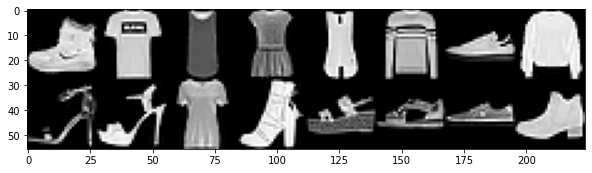

In [7]:
img = utils.make_grid(images, padding=0)   # 이미지들을 묶어서 표현하겠다
npimg = img.numpy()
plt.figure(figsize=(10, 7))
# 데이터셋의 행렬이랑 matplotlib의 행렬 구성이 달라서 matplot에 적합하게 맞춰줌
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [8]:
CLASSES = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

for label in labels:
  index = label.item()
  print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


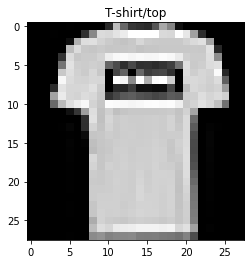

In [9]:
idx = 1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()